In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [4]:
from PIL import Image
#from tensorflow.keras.preprocessing import image_dataset_from_directory

In [5]:
train_path = 'datasets/Annotated Images/Train/'
test_path = 'datasets/Annotated Images/Test/'

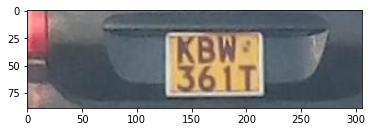

In [6]:
#display image of a license plate
image = Image.open('datasets/Annotated Images/Train/plate_number/plate_2.jpeg')
plt.imshow(np.array(image))

In [7]:
datagen = ImageDataGenerator()

In [8]:
datagen_flow = datagen.flow_from_directory(
    # the folder with the dataset
    train_path,
    # the target image size
    target_size=(256, 256), 
    # the batch size
    #batch_size=3,
    # class mode
    class_mode=None,
    # set a random number generator
    seed=0)

Found 17 images belonging to 1 classes.


In [9]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224, 224), batch_size=3)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224, 224), batch_size=1, 
                                     shuffle=False)

Found 17 images belonging to 1 classes.
Found 5 images belonging to 1 classes.
